<a href="https://colab.research.google.com/github/Sacrobots/All-ML-Executions/blob/main/Big_Mart_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# pip install xgboost

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [86]:
df = pd.read_csv('/content/Train.csv')
df.head()

# Item_Outlet_Sales is target variable

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [87]:
df.shape

(8523, 12)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [89]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [90]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [91]:
# Check missing values

df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [92]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [93]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [94]:
df.groupby('Outlet_Type')['Outlet_Size'].count()

,Outlet_Size
Outlet_Type,
Grocery Store,528
Supermarket Type1,3722
Supermarket Type2,928
Supermarket Type3,935


In [95]:
# Define a function that returns the mode for each group
def fill_mode(series):
    mode = series.mode()
    return mode[0] if not mode.empty else np.nan

# Apply fill using group-wise transformation
df['Outlet_Size'] = df['Outlet_Size'].fillna(
    df.groupby('Outlet_Type')['Outlet_Size'].transform(fill_mode)
)

In [96]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


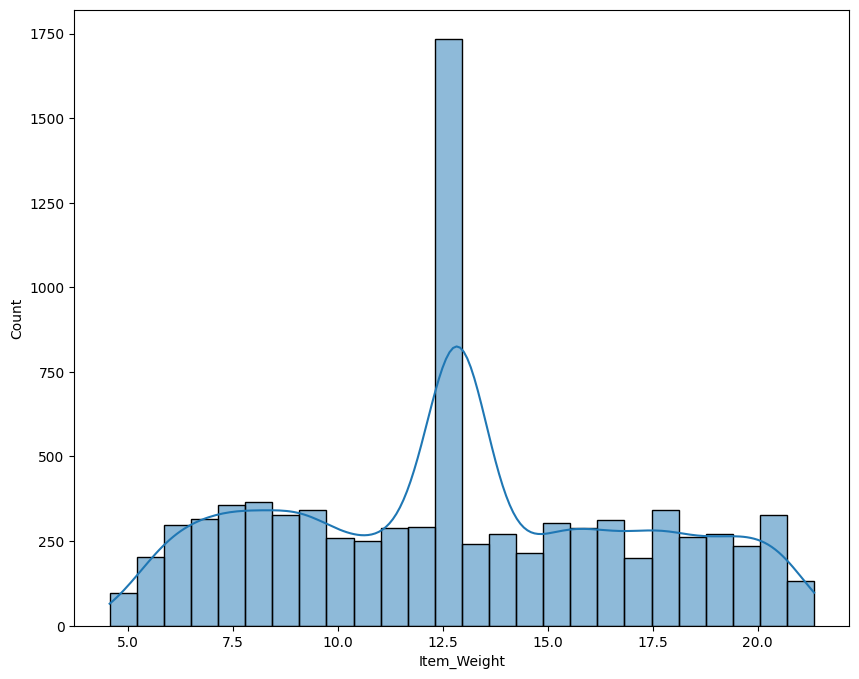

In [97]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Item_Weight'], kde=True)
plt.show()

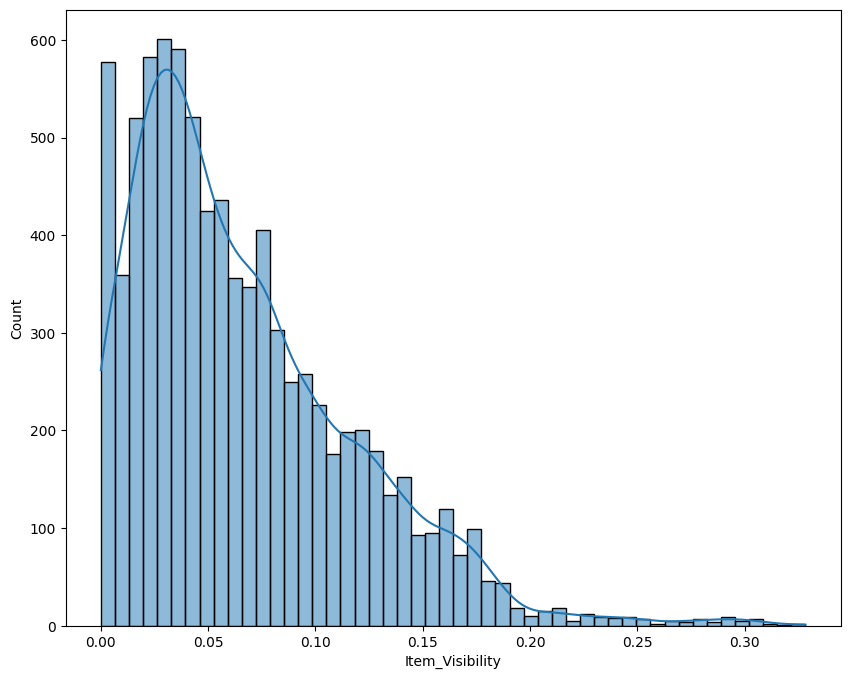

In [98]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Item_Visibility'], kde=True)
plt.show()

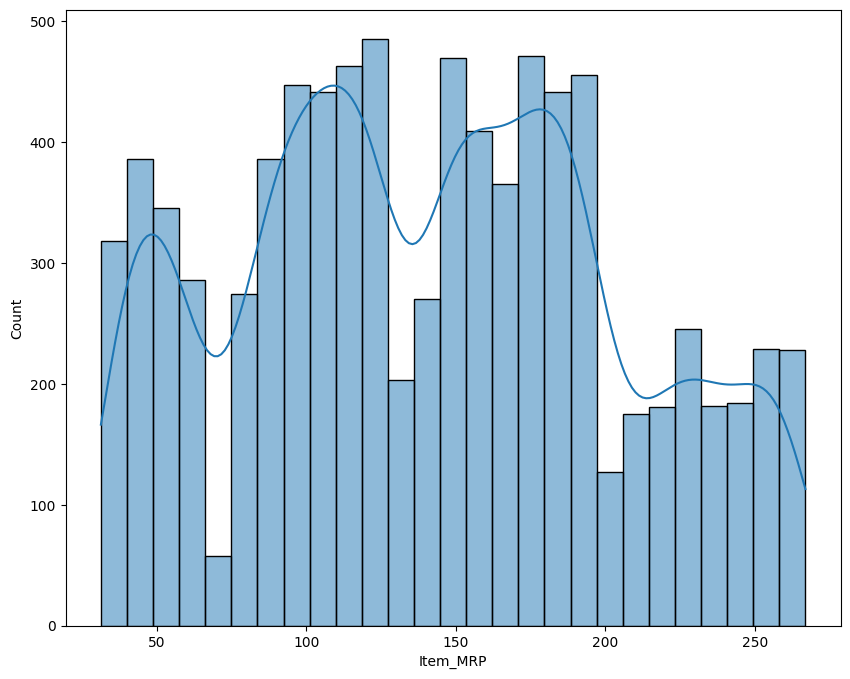

In [99]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Item_MRP'], kde=True)
plt.show()

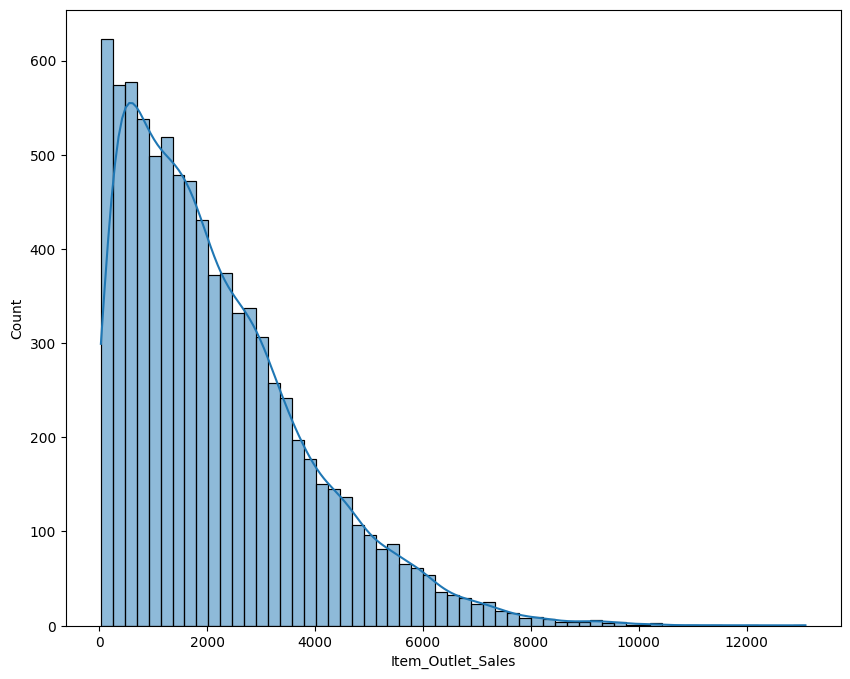

In [100]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.show()

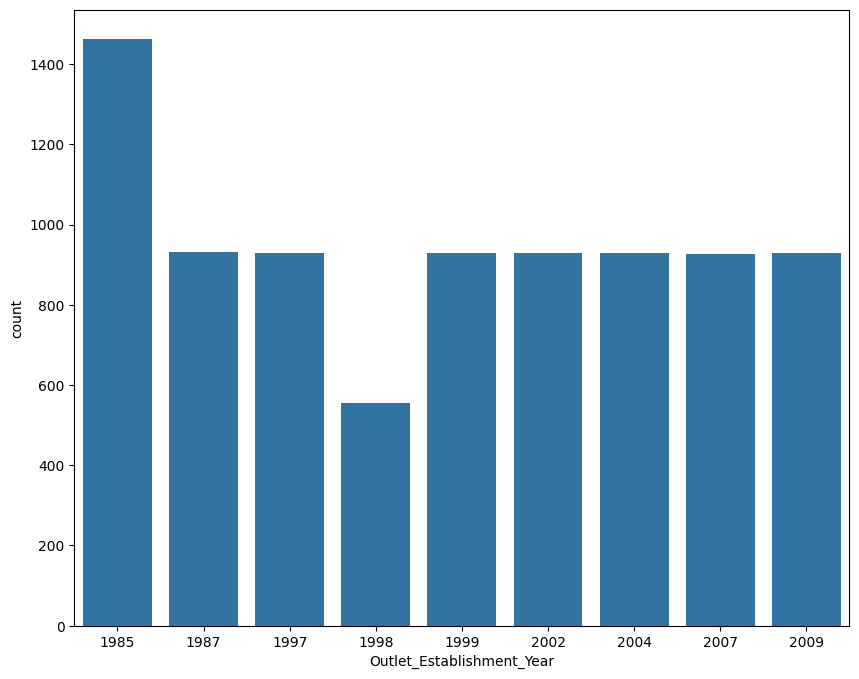

In [101]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

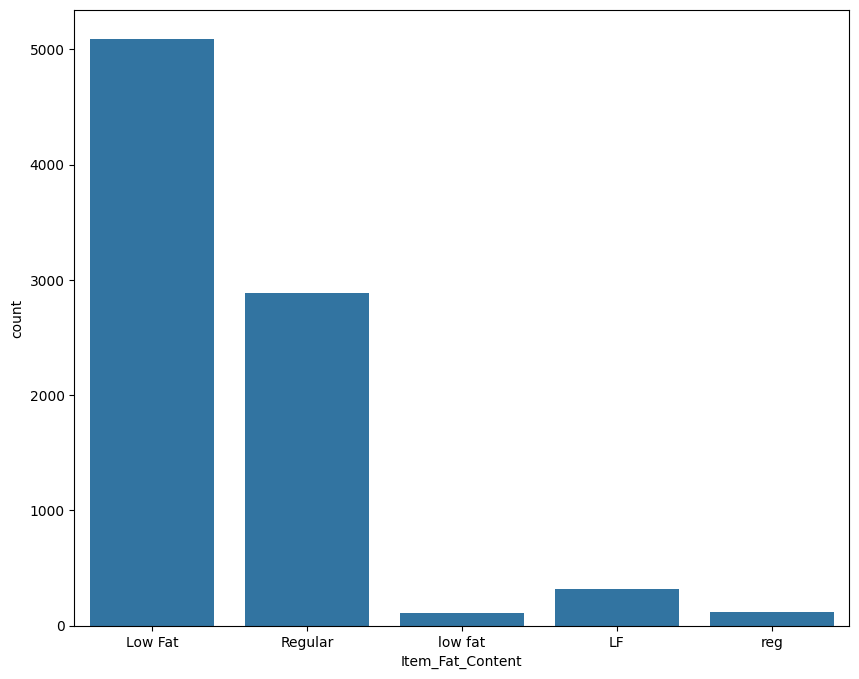

In [102]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

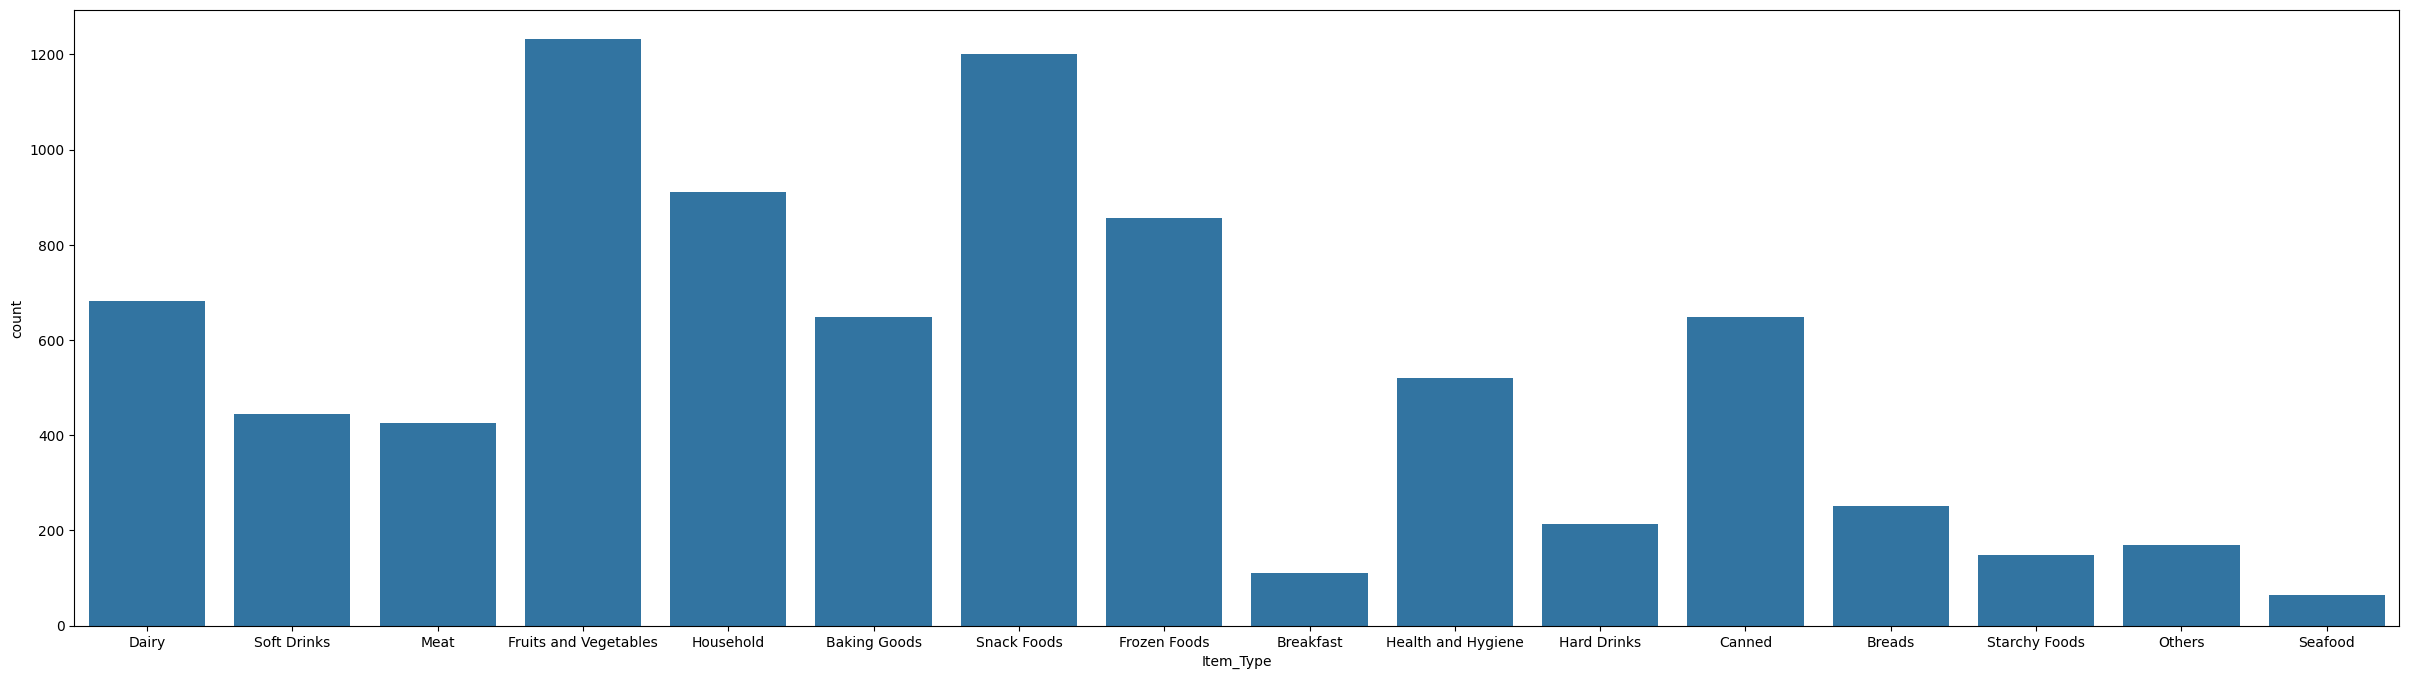

In [103]:
plt.figure(figsize=(30, 8))
sns.countplot(x='Item_Type', data=df)
plt.show()

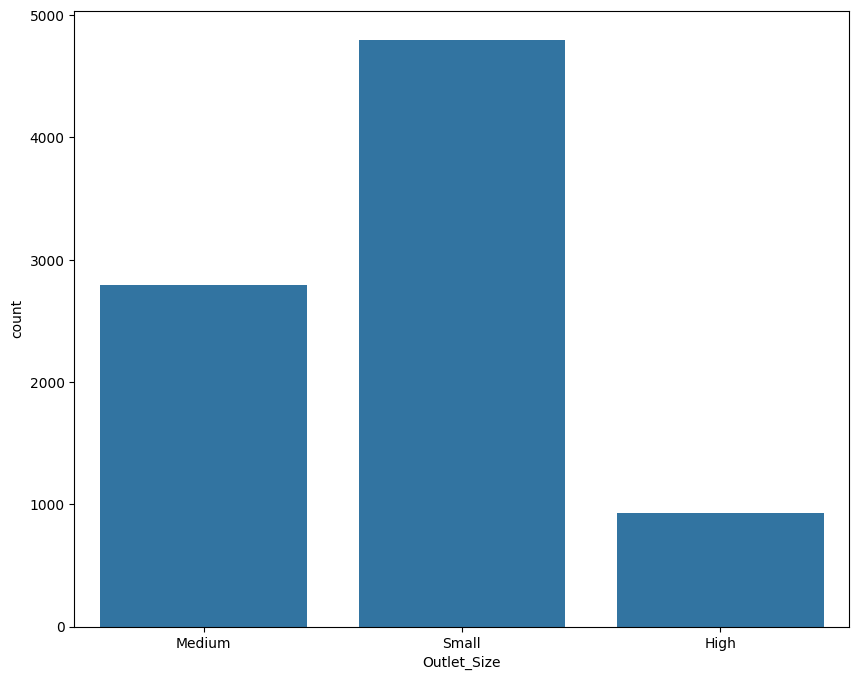

In [104]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

In [105]:
# Data Preprocessing

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [106]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [107]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
  'LF': 'Low Fat',
  'low fat': 'Low Fat'
})

In [108]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
  'reg': 'Regular'
})

In [109]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Label Encoding

In [110]:
categorical_values = [x for x in df.columns if df[x].dtype == 'object']

categorical_values

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [111]:
encoder = LabelEncoder()

In [112]:
for i in categorical_values:

  df[i] = encoder.fit_transform(df[i])

In [113]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [114]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [116]:
X_train.shape, y_train.shape

((6818, 11), (6818,))

Training ML model using XGBoost Regressor

In [117]:
regressor = XGBRegressor()

In [118]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [119]:
# Evaluation

y_pred = regressor.predict(X_test)

In [120]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.5017253991620692